# PISA Data Exploration
## by Simon Hwang

## Investigation Overview
I will show the importance of investigating PISA data using the means that were suggested in the PISA Data Analysis Manual. We will examine the sample sizes of various countries and their effect on the subsequent analysis, when assuming standard methods are faultless. I hope to demonstrate the importance of using PISA's suggested data wrangling methods of weighting, plausible value calculation, and replication. These are essential for compensating for inherent increases in error and data anomalies, such as varying sample sizes depending on country.

## Dataset Overview
The Programme for International Student Assessment (PISA) is a means of measuring 15-year-old student ability in reading, mathematics, and science. The assessments are conducted every 3 years since 2000, and usually garner participation from about 80 countries. The following presentation investigates a small, key subset of the full dataset for the 34 member countries in the Organisation for Economic Co-operation and Development (OECD).

In [1]:
# import all packages and set plots to be embedded inline
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sb

%matplotlib inline

# suppress warnings from final output
import warnings
warnings.simplefilter("ignore")

In [2]:
# load in the dataset into a pandas dataframe
df = pd.read_csv('pisa_subset.csv')
df.head()

,Country,Sex,SocioEconIndex,MathScore,ReadScore,ScienceScore
0,Australia,Female,0.70,562.63438,582.47156,581.81648
1,Australia,Female,-1.17,557.33758,575.64050,601.58522
2,Australia,Female,0.01,513.24974,584.45730,566.80344
3,Australia,Male,0.77,578.52470,609.54018,640.19024
4,Australia,Male,0.80,519.24754,553.32384,603.26370


## PISA Student Sampling is Not Uniform

The recommended minimum sample size for PISA testing is 5000 students. Most countries come close to it or slightly exceed it, but there are notable exceptions. Iceland is an outlier in that they are population-limited and do not have enough 15-year-olds to reach that number. To compensate for this and the countries that choose to test far beyond the minimum, PISA provides weights for student responses based on the country's total population. This is one of several methods to ensure the accuracy of analysis.

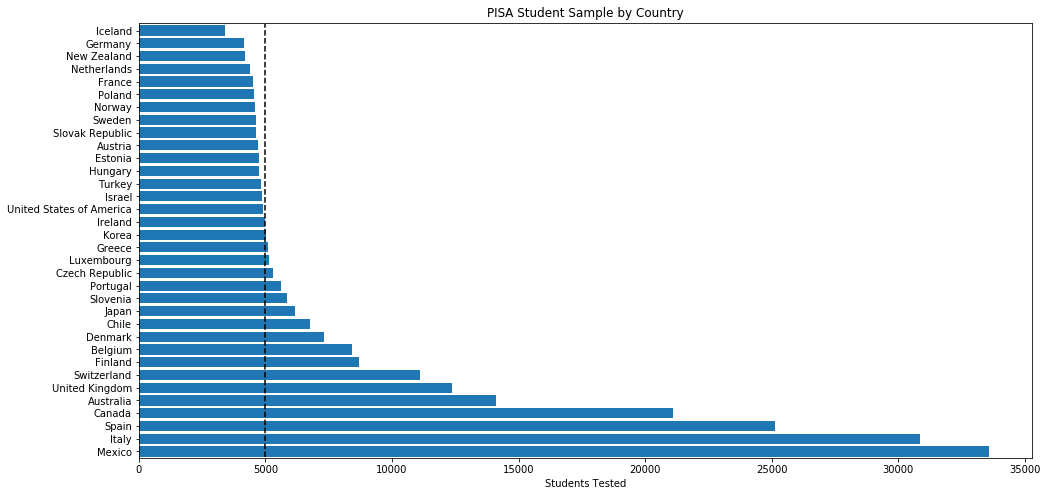

In [3]:
plt.figure(figsize=(16,8))
plt.barh(width=df.Country.value_counts(), y=df.Country.value_counts().index)
plt.ylim(-0.5, 33.6);
plt.vlines(5000, -0.4, 33.5, linestyle='dashed')
plt.xlabel('Students Tested')
plt.title('PISA Student Sample by Country');

## Overtesting Skews Summary Statistics
At 38.2% of the total global sample, just four countries (Mexico, Italy, Spain, and Canada) account for more than a third of the student responses. Since PISA does not put an upper limit on how many students can be tested, the weighting of the responses is vital to any data analysis that seeks to draw conclusions about the global population. Without weighting, the larger number of responses from those countries with more testing would disproportionately affect any summary statistics calculated for the global population.

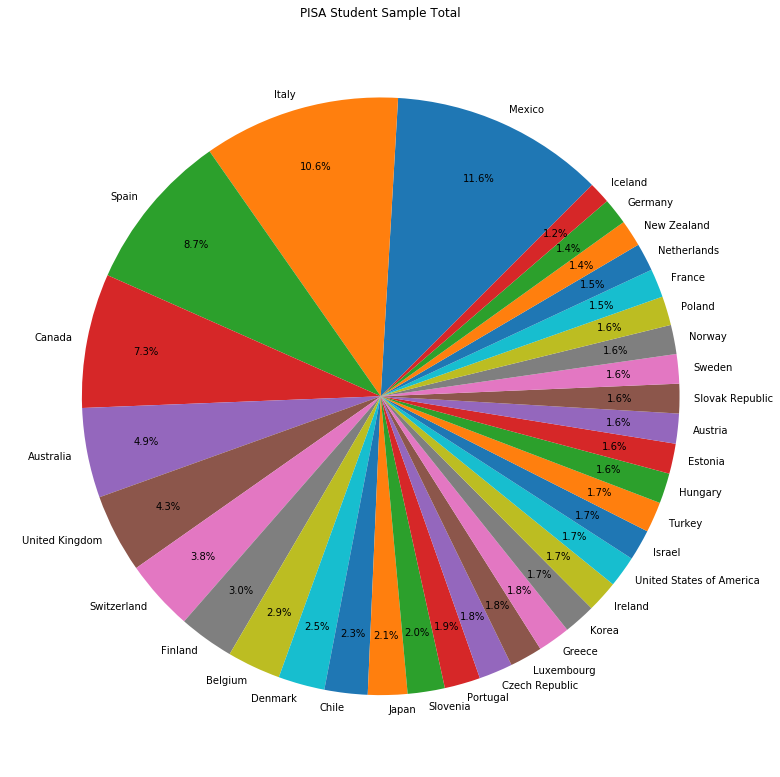

In [4]:
plt.figure(figsize=(11, 11))
plt.pie(df.Country.value_counts(), labels=df.Country.value_counts().index, startangle=45, \
       labeldistance=1.05, autopct='%1.1f%%', pctdistance=0.8)
plt.tight_layout()
plt.title('PISA Student Sample Total');

## Global Student Sample by Sex

Once we start looking at female vs. male, it becomes obvious that the higher testing rates of Mexico start to influence any statistics we might calculate for the global population. Since Mexico has a female-heavy sample, they skew the whole global sample rate almost .2% (right). If you look at the _relative_ sex breakdown by country (left), you can see there is almost no skew at all, globally.

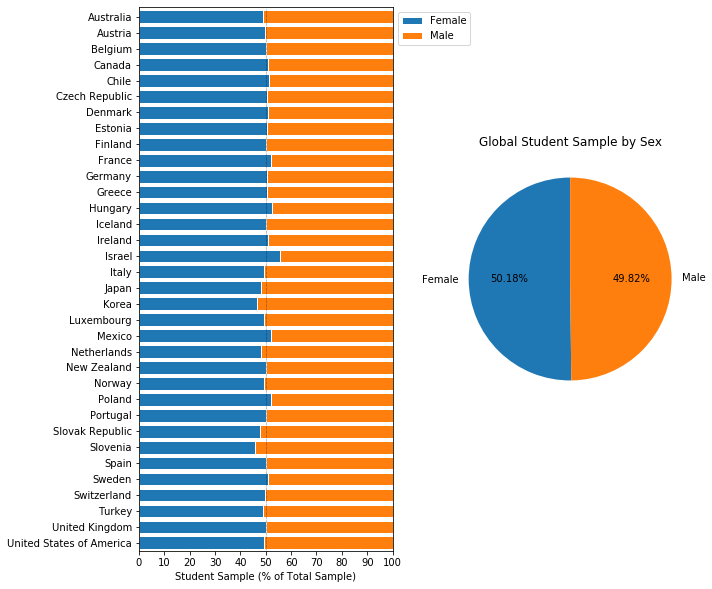

In [5]:
# preparing for graph
sex = df.groupby('Sex').Country.value_counts()
female = sex.loc['Female']
male = sex.loc['Male']
both = df.Country.value_counts()
fem_rel = (female/both) * 100
mal_rel = (male/both) * 100
fem_rel.sort_index(ascending=False,inplace=True)
mal_rel.sort_index(ascending=False,inplace=True)

fig, axs = plt.subplots(1, 2, figsize=(10,10))

axs[0].barh(y=fem_rel.index, width=fem_rel, color='tab:blue', edgecolor='white', label='Female')
axs[0].barh(y=fem_rel.index, width=mal_rel, left=fem_rel, color='tab:orange', edgecolor='white'\
            ,label='Male')
axs[0].set_ylim(-0.5, 33.6)
axs[0].set_xlim(0,100)
axs[0].set_ylabel('')
axs[0].set_xlabel('Student Sample (% of Total Sample)')
axs[0].set_xticks(np.arange(0,101,10))
axs[0].vlines(50, -0.4, 33.5, linestyle='dotted', linewidth=0.5)
axs[0].legend(loc='upper left', bbox_to_anchor=(1,1), ncol=1)

axs[1].pie(df.Sex.value_counts(), labels=df.Sex.value_counts().index, startangle=90, autopct='%1.2f%%');
axs[1].set_title('Global Student Sample by Sex');

## PISA Average Scores by Country and Sex

Taking specific look at Mexico again, we can see that their Socioeconomic Index mean is really low along with their PISA scores in general. With >32000 students, this would unrealistically drag down the global average if I were to perceive all global student responses as evenly weighted. Most countries only test 5000, and could have more than double the population of Mexico, such as the United States of America.

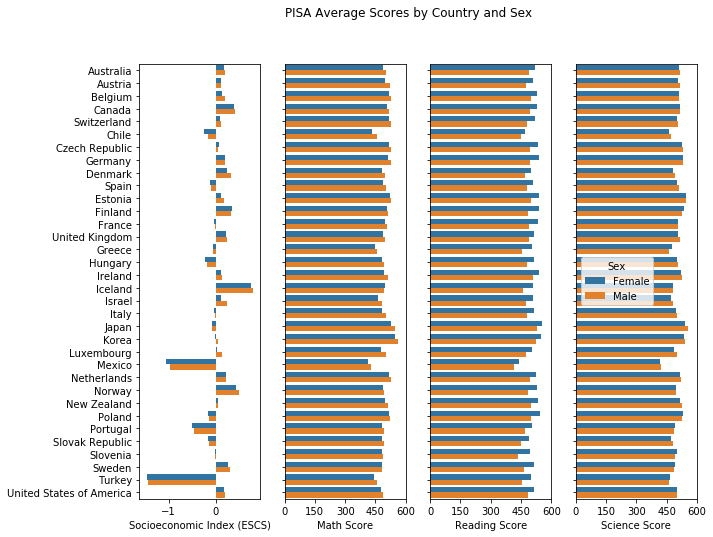

In [6]:
ticks = np.arange(0, 601, 150)
fig, axs = plt.subplots(1, 4, sharey=True, figsize=(10,8))
sb.barplot(x='SocioEconIndex', y='Country', hue='Sex',data=df, ax=axs[0], errwidth=0)
axs[0].set_xlabel('Socioeconomic Index (ESCS)')
axs[0].set_ylabel('')
sb.barplot(x='MathScore', y='Country', hue='Sex',data=df, ax=axs[1], errwidth=0)
axs[1].set_xlabel('Math Score')
axs[1].set_xticks(ticks)
sb.barplot(x='ReadScore', y='Country', hue='Sex',data=df, ax=axs[2], errwidth=0)
axs[2].set_xlabel('Reading Score')
axs[2].set_xticks(ticks)
sb.barplot(x='ScienceScore', y='Country', hue='Sex',data=df, ax=axs[3], errwidth=0)
axs[3].set_xlabel('Science Score')
axs[3].set_xticks(ticks)
for i in range(0,3):
    axs[i].get_legend().remove()
for i in range(1,4):
    axs[i].label_outer()
fig.suptitle('PISA Average Scores by Country and Sex');

## I hope I've given you a taste of the importance of diligently wrangling the data to ensure the accuracy of calculated statistics and error. Additional information and explanation can be found in the readme. Thanks for your time.